In [1]:
#import the libraries for VGG16
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

2024-11-02 18:03:01.448794: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 18:03:01.457008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 18:03:01.565370: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 18:03:01.622605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 18:03:01.706340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
trdata=ImageDataGenerator()
traindata=trdata.flow_from_directory(directory="emotion_detectin/train",target_size=(224,224))
tsdata=ImageDataGenerator()
testdata=tsdata.flow_from_directory(directory="emotion_detectin/validation",target_size=(224,224))

Found 28821 images belonging to 7 classes.
Found 7067 images belonging to 7 classes.


In [11]:
# Retrieve class indices and sort them by index to get the correct label order
emotion_labels = [label for label, index in sorted(traindata.class_indices.items(), key=lambda x: x[1])]

print("Class labels as detected by ImageDataGenerator:", emotion_labels)

Class labels as detected by ImageDataGenerator: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [3]:
"""model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))"""

'model = Sequential()\nmodel.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))\nmodel.add(Conv2D(filters=5

In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(244,244,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(7, activation="sigmoid"))


/home/reshni/py3_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
"""# Initialize the model
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=7, activation="softmax"))  # Adjust number of units to match your classes"""


'# Initialize the model\nmodel.add(Flatten())\nmodel.add(Dense(units=4096, activation="relu"))\nmodel.add(Dense(units=4096, activation="relu"))\nmodel.add(Dense(units=7, activation="softmax"))  # Adjust number of units to match your classes'

In [6]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 244, 244, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 122, 122, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,289,223 (512.27 MB)

 Trainable params: 134,289,223 (512.27 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size=32
# Update your checkpoint to use 'val_accuracy'
checkpoint = ModelCheckpoint("vgg16_1.keras", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

# Update early stopping to monitor 'val_accuracy' with mode='max'
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max')

# Ensure your steps_per_epoch and validation_steps are set appropriately
steps_per_epoch = len(traindata) // batch_size  # Adjust based on your data
validation_steps = len(testdata) // batch_size   # Adjust based on your data


In [ ]:
hist = model.fit(
    traindata,
    steps_per_epoch=steps_per_epoch,
    validation_data=testdata,
    validation_steps=validation_steps,
    epochs=200,
    callbacks=[checkpoint,early]
)

/home/reshni/py3_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.2183 - loss: 1.8765 
Epoch 1: val_accuracy improved from -inf to 0.22917, saving model to vgg16_1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 604s 22s/step - accuracy: 0.2183 - loss: 1.8757 - val_accuracy: 0.2292 - val_loss: 1.8237
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2632 - loss: 1.8030 
Epoch 2: val_accuracy improved from 0.22917 to 0.31250, saving model to vgg16_1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 591s 21s/step - accuracy: 0.2634 - loss: 1.8025 - val_accuracy: 0.3125 - val_loss: 1.7351
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2388 - loss: 1.8143 
Epoch 3: val_accuracy did not improve from 0.31250
28/28 ━━━━━━━━━━━━━━━━━━━━ 567s 20s/step - accuracy: 0.2389 - loss: 1.8142 - val_accuracy: 0.2552 - val_loss: 1.8524
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.2634 - loss: 1.7874 
Epoch 4: val_accuracy did not improve from 0.31250
28/28 ━━━━━━━━━━━━━━━━━━━━ 574s 21

In [17]:
from tensorflow.keras.models import load_model

model = load_model('vgg16_1.keras')


In [2]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

NameError: name 'hist' is not defined

In [15]:
from tensorflow.keras.optimizers import Adam

# Change the learning rate to a lower value, like 0.0001
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [16]:
model.fit(traindata, 
          epochs=200, 
          validation_data=testdata, 
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          callbacks=[checkpoint,early],
          initial_epoch=25)  # Set this to the last completed epoch + 1


/home/reshni/py3_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 26/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.2290 - loss: 2.2398 
Epoch 26: val_accuracy improved from -inf to 0.22917, saving model to vgg16_1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 545s 19s/step - accuracy: 0.2278 - loss: 2.2318 - val_accuracy: 0.2292 - val_loss: 1.8478
Epoch 27/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.2489 - loss: 1.8699 
Epoch 27: val_accuracy did not improve from 0.22917
28/28 ━━━━━━━━━━━━━━━━━━━━ 740s 27s/step - accuracy: 0.2478 - loss: 1.8693 - val_accuracy: 0.1198 - val_loss: 1.8454
Epoch 28/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.2211 - loss: 1.8386 
Epoch 28: val_accuracy improved from 0.22917 to 0.23958, saving model to vgg16_1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 699s 25s/step - accuracy: 0.2219 - loss: 1.8386 - val_accuracy: 0.2396 - val_loss: 1.8509
Epoch 29/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2615 - loss: 1.8270 
Epoch 29: val_accuracy did not improve from 0.23958
28/28 ━━━━━━━━━━━━━━━━━━━━

2024-11-02 02:36:04.205878: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 58: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.4403 - loss: 1.4460 - val_accuracy: 0.4896 - val_loss: 1.5058
Epoch 59/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.4595 - loss: 1.3879 
Epoch 59: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 522s 19s/step - accuracy: 0.4595 - loss: 1.3878 - val_accuracy: 0.4427 - val_loss: 1.4981
Epoch 60/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.4827 - loss: 1.4013 
Epoch 60: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 674s 24s/step - accuracy: 0.4824 - loss: 1.4009 - val_accuracy: 0.4740 - val_loss: 1.3842
Epoch 61/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.4237 - loss: 1.4585 
Epoch 61: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 588s 21s/step - accuracy: 0.4240 - loss: 1.4565 - val_accuracy: 0.4740 - val_loss: 1.3592
Epoch 62/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy:

2024-11-02 03:15:21.369136: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.4430 - loss: 1.3987 
Epoch 63: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 551s 20s/step - accuracy: 0.4435 - loss: 1.3988 - val_accuracy: 0.5156 - val_loss: 1.3471
Epoch 64/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.5032 - loss: 1.3204 
Epoch 64: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 546s 20s/step - accuracy: 0.5031 - loss: 1.3201 - val_accuracy: 0.5208 - val_loss: 1.2898
Epoch 65/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 383s/step - accuracy: 0.4783 - loss: 1.3235  
Epoch 65: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 10391s 384s/step - accuracy: 0.4790 - loss: 1.3234 - val_accuracy: 0.4948 - val_loss: 1.3444
Epoch 66/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.4780 - loss: 1.2986 
Epoch 66: val_accuracy did not improve from 0.52604
28/28 ━━━━━━━━━━━━━━━━━━━━ 494s 18s/step - accuracy: 0.4777 - loss: 1.2990 - val_accuracy: 0.4948 - v

In [3]:
from tensorflow.keras.models import load_model

model_ = load_model('vgg16_1.keras')

Found 7067 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


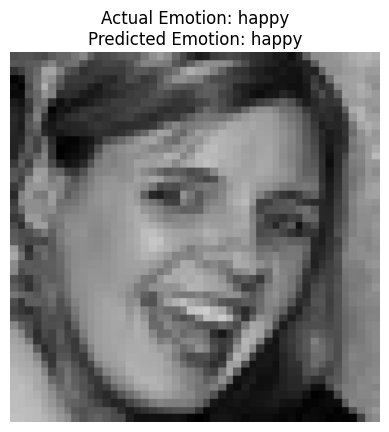

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

emotion_labels = [label for label, index in sorted(traindata.class_indices.items(), key=lambda x: x[1])]

# Function to test and display image with actual and predicted emotion
def test_and_display_image(model, testdata, index=0):
    # Retrieve a single batch of images and labels
    test_images, test_labels = next(testdata)
    
    # Select the image and label at the specified index
    img = test_images[index]
    true_label = np.argmax(test_labels[index])  # Get the actual emotion label index
    true_emotion = emotion_labels[true_label]

    # Prepare the image for prediction
    input_img = np.expand_dims(img, axis=0)
    
    # Get predictions from the model
    predictions = model.predict(input_img)
    predicted_index = np.argmax(predictions[0])
    predicted_emotion = emotion_labels[predicted_index]
    
    # Normalize the image to the valid range for display
    if img.max() > 1.0:  # If values are in the range [0, 255]
        img = img / 255.0  # Normalize to [0, 1] for imshow

    # Check if the image is grayscale or RGB
    if img.shape[-1] == 1:  # Grayscale
        plt.imshow(img.squeeze(), cmap='gray')
    else:  # RGB
        plt.imshow(img)
    
    # Display the title with actual and predicted emotions
    plt.title(f"Actual Emotion: {true_emotion}\nPredicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

# Load validation data
testdata = ImageDataGenerator().flow_from_directory(directory="emotion_detectin/validation", target_size=(224, 224))

# Run the function with your model and testdata
test_and_display_image(model_, testdata, index=0)  # Change index to test different images


Found 7067 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


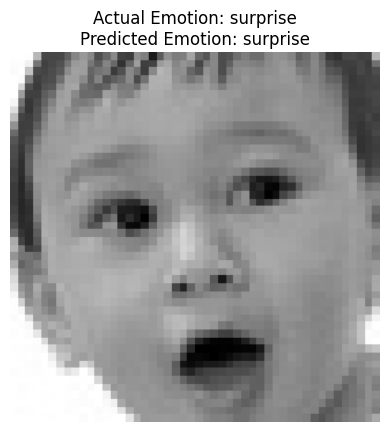

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

emotion_labels = [label for label, index in sorted(traindata.class_indices.items(), key=lambda x: x[1])]

# Function to test and display image with actual and predicted emotion
def test_and_display_image(model, testdata, index=0):
    # Retrieve a single batch of images and labels
    test_images, test_labels = next(testdata)
    
    # Select the image and label at the specified index
    img = test_images[index]
    true_label = np.argmax(test_labels[index])  # Get the actual emotion label index
    true_emotion = emotion_labels[true_label]

    # Prepare the image for prediction
    input_img = np.expand_dims(img, axis=0)
    
    # Get predictions from the model
    predictions = model.predict(input_img)
    predicted_index = np.argmax(predictions[0])
    predicted_emotion = emotion_labels[predicted_index]
    
    # Normalize the image to the valid range for display
    if img.max() > 1.0:  # If values are in the range [0, 255]
        img = img / 255.0  # Normalize to [0, 1] for imshow

    # Check if the image is grayscale or RGB
    if img.shape[-1] == 1:  # Grayscale
        plt.imshow(img.squeeze(), cmap='gray')
    else:  # RGB
        plt.imshow(img)
    
    # Display the title with actual and predicted emotions
    plt.title(f"Actual Emotion: {true_emotion}\nPredicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

# Load validation data
testdata = ImageDataGenerator().flow_from_directory(directory="emotion_detectin/validation", target_size=(224, 224))

# Run the function with your model and testdata
test_and_display_image(model_, testdata, index=0)  # Change index to test different images
